#**Data Project 4**
Julen Aguirreurreta y Ramón Casans 

## Carga de Datos

In [1]:
#Instalar dependencias
!pip install kaggle
!pip install pydicom
!pip install fastai
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Cracion de kaggle.json con la api de kaggle
!mkdir ~/.kaggle 
!echo '{"username":"racasc","key":"91ad9a6a6c0d9761a56111483280c346"}' > ~/.kaggle/kaggle.json 
!chmod 600 ~/.kaggle/kaggle.json  
!pip install kaggle 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
#Busqueda del dataset
!kaggle datasets list -s dataproject4

ref                  title         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------  ------------  ----  -------------------  -------------  ---------  ---------------  
racasc/dataproject4  dataproject4   4GB  2022-06-04 13:56:52            115          1  0.29411766       


In [5]:
#Descarga del dataset
! kaggle datasets download racasc/dataproject4 

100% 4.31G/4.32G [00:33<00:00, 144MB/s]
100% 4.32G/4.32G [00:33<00:00, 137MB/s]


In [6]:
#Unzip del dataset
!unzip dataproject4.zip
import os

Archive:  dataproject4.zip
  inflating: sample_submission.csv   
  inflating: test/1.2.826.0.1.3680043.8.498.60964782211363234805993194732570333546.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.61431034517465531958162912253173088073.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.62775586541135359915919720866789455246.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.66090421685182342980503431575556713055.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.67789794435741873870140624318123072500.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.68178124482700344734822346753000091962.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.69780693352510167266847316539821108215.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.71414931266984795263697005963391289642.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.71446631430051241458602990266940324877.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.72016401052462335241200397926602631772.jpg  
  inflating: test/1.2.826.0.1.3680043.8.498.7

In [7]:
!rm dataproject4.zip

## Carga y exploración de datos

In [8]:
import pandas as pd
import glob

#carga de datos del csv
train_csv = pd.read_csv("/content/train.csv")

#Creacion de subcarpetas dentro de la carpeta train
for folder in list(train_csv.Target.unique()):
  os.mkdir(f'train/{folder}')

#Añadido de imagenes a las distintas subcarpetas
for file in glob.glob("./train/*.jpg"):
  folder = train_csv.loc[train_csv.SOPInstanceUID == file[8:-4]].Target.values[0]
  path_dest = f"./train/{folder}/" + file[8:]
  os.system(f"mv {file} {path_dest}")



In [9]:
from fastai.vision import *

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
path = "/content/"

In [12]:
# Cargar data
batch_size = 128
size = 300
data = ImageDataBunch.from_folder(path =path ,train="/content/train", test="/content/test", 
                                  valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=size, 
                                  bs=batch_size
                                  ).normalize(imagenet_stats)

In [13]:
# Vista de las clases de las imagenes
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [14]:
print(len(data.classes))

22


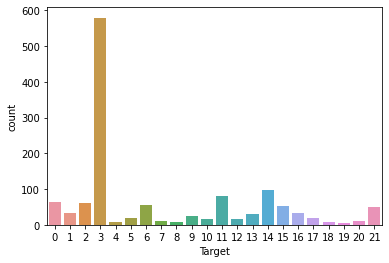

In [ ]:
#Visualizacion de las diferentes clases
import seaborn as sns
sns.countplot(data = train_csv, x="Target")
plt.show()

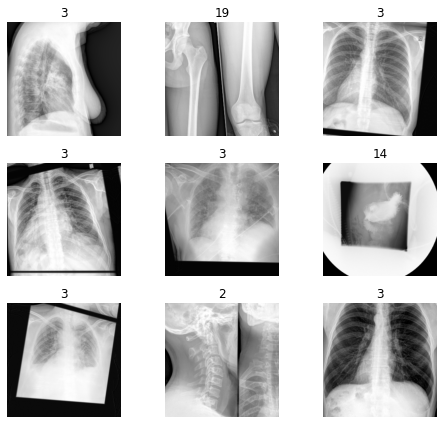

In [15]:
#Vista de ejemplos de iamgenes con sus categorias
data.show_batch(rows=3, figsize=(7,6))

## Entrenamiento del modelo

In [16]:
#Creacion del entrenamiento con el modelo Resnet 18
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


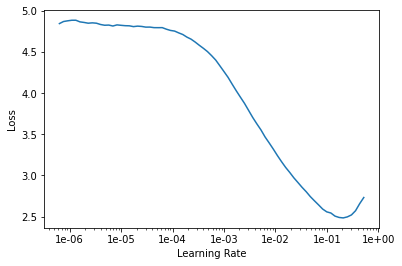

In [18]:
# Obtención de la tasa de aprendizaje optima
learn.lr_find()
learn.recorder.plot()

In [19]:
#Tasa de aprendizaje optima
lr =3e-3

In [20]:
#Entrenamiento de 15 epochs
learn.fit_one_cycle(15, max_lr=slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,4.413553,3.335681,0.129412,04:10
1,3.656483,1.715922,0.537255,04:12
2,2.839375,1.300563,0.678431,04:10
3,2.285926,0.975596,0.733333,04:09
4,1.857161,0.780389,0.776471,04:08
5,1.551300,0.578438,0.819608,04:09
6,1.317253,0.464839,0.878431,04:10
7,1.130939,0.376929,0.901961,04:08
8,0.987700,0.360191,0.901961,04:11
9,0.866482,0.339027,0.905882,04:13


In [21]:
# Guardado de modelo
learn.save("Modelo")

In [22]:
#Carga de modelo
learn.load("Modelo")

Learner(data=ImageDataBunch;

Train: LabelList (1023 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
9,9,9,9,9
Path: /content;

Valid: LabelList (255 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
14,1,3,2,3
Path: /content;

Test: LabelList (328 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: EmptyLabelList
,,,,
Path: /content, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3)

## Evaluación de los resultados

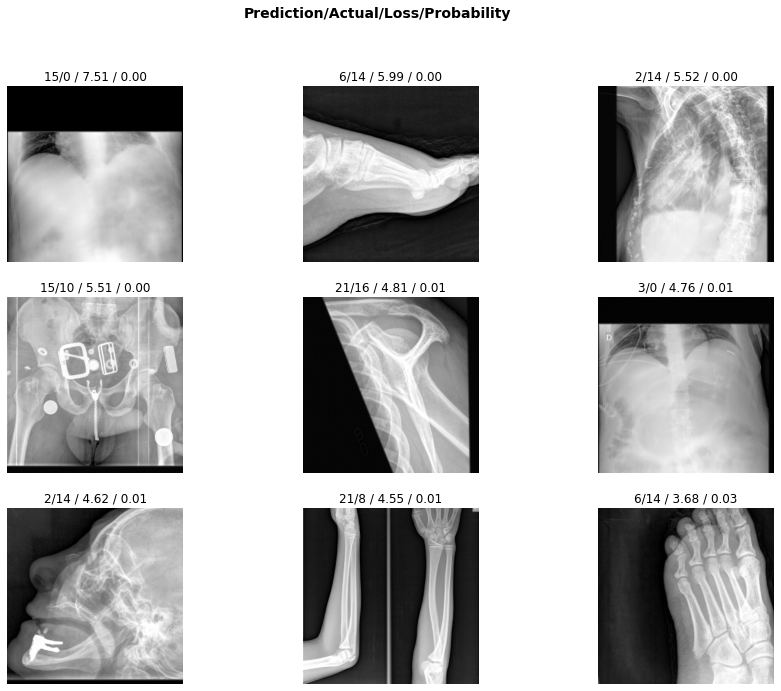

In [23]:
# Mostrar muestras peor classificadas
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

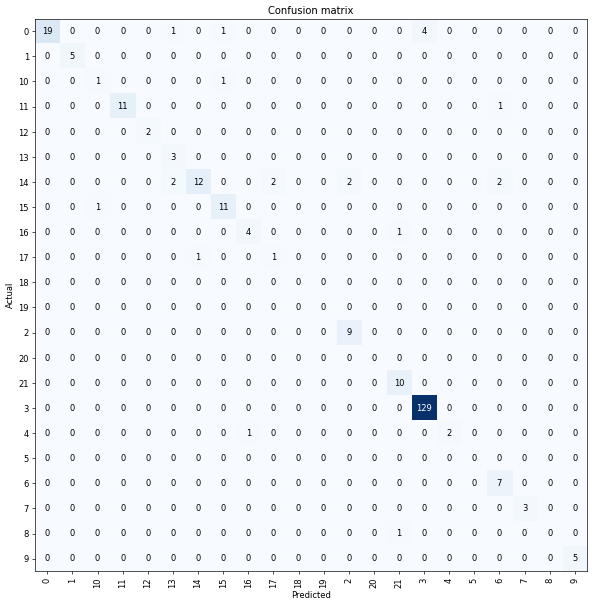

In [38]:
# Matriz de confusión
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [25]:
# Clases mas confusas
interp.most_confused(min_val=2)

[('0', '3', 4),
 ('14', '13', 2),
 ('14', '17', 2),
 ('14', '2', 2),
 ('14', '6', 2)]

## Creación csv con los resultados


In [26]:
#Carga de csv submission
submission_csv = pd.read_csv("/content/sample_submission.csv")
submission_csv

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.75932240489221075589...,0
1,1.2.826.0.1.3680043.8.498.80518330963406833915...,0
2,1.2.826.0.1.3680043.8.498.97413731471864060627...,0
3,1.2.826.0.1.3680043.8.498.98229201581139590153...,0
4,1.2.826.0.1.3680043.8.498.84551354213532970228...,0
...,...,...
323,1.2.826.0.1.3680043.8.498.60964782211363234805...,0
324,1.2.826.0.1.3680043.8.498.90617059056548212763...,0
325,1.2.826.0.1.3680043.8.498.77795747668217965858...,0
326,1.2.826.0.1.3680043.8.498.83898837859028979514...,0


In [27]:
Test = "/content/test"

In [28]:
#realizacion de predicción
preds_test, target_test = learn.get_preds(DatasetType.Test)
y = torch.argmax(preds_test, dim=1)
y.numpy().shape

(328,)

In [29]:
#Muestra de tamaño de predicción
preds_test.shape

torch.Size([328, 22])

In [30]:
target_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
preds_test

tensor([[2.7356e-05, 7.7400e-05, 2.3214e-05,  ..., 5.0001e-05, 2.0462e-02,
         2.2531e-04],
        [4.2623e-07, 4.2572e-09, 1.6659e-08,  ..., 7.8085e-08, 2.2832e-07,
         2.2049e-07],
        [5.7297e-09, 1.5361e-06, 3.1923e-08,  ..., 8.6121e-08, 6.0403e-07,
         4.2974e-07],
        ...,
        [1.6552e-04, 9.9963e-06, 5.4842e-06,  ..., 2.4297e-05, 9.6039e-06,
         7.1038e-06],
        [1.5231e-04, 3.1092e-04, 4.1037e-05,  ..., 3.1343e-04, 6.7875e-05,
         2.9402e-05],
        [1.1089e-06, 1.9514e-06, 6.3820e-07,  ..., 4.1648e-06, 1.1092e-05,
         1.3529e-06]])

In [32]:
# Ordenamiento de las predicciones
pred_classes = []
for index in y:
  pred_classes.append(int(data.classes[index]))

len(pred_classes)

328

In [33]:
# Ordenamiento de las predicciones con las imagenes
num = len(learn.data.test_ds)
filenames = []
for i in range(num):
  filenames.append(str(learn.data.test_ds.items[i]).split('/')[3])

In [34]:
# Carga de csv con los datos de imagenes y predicciones
submission=pd.read_csv('/content/sample_submission.csv')
print(submission.shape)
submission['Target']= pred_classes
submission["SOPInstanceUID"] = filenames
submission

(328, 2)


,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.94213681653865343106...,21
1,1.2.826.0.1.3680043.8.498.80216376436506174361...,3
2,1.2.826.0.1.3680043.8.498.88655360626105586385...,11
3,1.2.826.0.1.3680043.8.498.76482195481290376937...,14
4,1.2.826.0.1.3680043.8.498.85006210041675057929...,0
...,...,...
323,1.2.826.0.1.3680043.8.498.94628786370134083856...,3
324,1.2.826.0.1.3680043.8.498.85094154754033747970...,6
325,1.2.826.0.1.3680043.8.498.77469401758687792239...,3
326,1.2.826.0.1.3680043.8.498.75944278189054974260...,3


In [35]:
# Guardado de csv
submission.to_csv('submission.csv',index=False)

In [36]:
# Eliminación de .jpg del csv
text = open("submission.csv", "r")
text = ''.join([i for i in text]) \
    .replace(".jpg", "")
x = open("kaggle_submission.csv","w")
x.writelines(text)
x.close()

In [37]:
# Guardado del csv para subida a kaggle
kaggle_csv = pd.read_csv("/content/kaggle_submission.csv")
kaggle_csv

,SOPInstanceUID,Target
0,1.2.826.0.1.3680043.8.498.94213681653865343106...,21
1,1.2.826.0.1.3680043.8.498.80216376436506174361...,3
2,1.2.826.0.1.3680043.8.498.88655360626105586385...,11
3,1.2.826.0.1.3680043.8.498.76482195481290376937...,14
4,1.2.826.0.1.3680043.8.498.85006210041675057929...,0
...,...,...
323,1.2.826.0.1.3680043.8.498.94628786370134083856...,3
324,1.2.826.0.1.3680043.8.498.85094154754033747970...,6
325,1.2.826.0.1.3680043.8.498.77469401758687792239...,3
326,1.2.826.0.1.3680043.8.498.75944278189054974260...,3
